In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/DLALS/Aggregation_k=7.txt',sep='\t',header=None)

In [ ]:
X=df[0]
Y=df[1]
label=df[2]
import numpy as np

In [ ]:
classes=set(label)

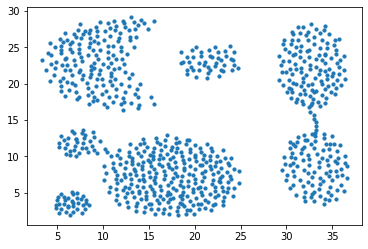

In [ ]:
#two centroids are plotted
import matplotlib.pyplot as plt
plt.scatter(X,Y,s=10)
# plt.scatter(rand_x1,rand_y1,color='red',s=100,marker='*')
# plt.scatter(rand_x2,rand_y2,color='red',s=100,marker='*')

In [ ]:
data=df.iloc[:,:-1]
center=np.mean(data)
print(center)

0    19.566815
1    14.171764
dtype: float64


CENTER POINT CLEARLY VISIBLE IN THE GRAPH


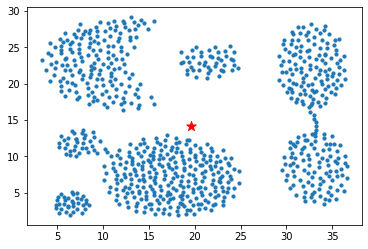

In [ ]:
plt.scatter(X,Y,s=10)
plt.scatter(center[0],center[1],color='red',s=100,marker='*')

NOW WILL BE FINDING TWO FARTHEST POINTS ON THE GRAPH 


In [ ]:
import math
import numpy as np
n=len(X)
max=-10000
posn=0
dist=0
for i in range(n):
  dist=math.sqrt((center[0]-data[0][i])**2+(center[1]-data[1][i])**2)
  if(dist>max):
    max=dist
    posn=i
print('MAXIMUM DISTANCE FROM CENTER AND POINT NUMBER AND X , Y COORDINATES OF FIRST FARTHEST POINT IS : ')
print(max,posn)
#we have first farthest point now and the point is : 
print(data[0][posn],data[1][posn])
farthest_x=np.array([[]],float)
farthest_x=[data[0][posn],data[1][posn]]

#now we will be finding second farthest point on graph : 
for i in range(n):
  dist=math.sqrt((farthest_x[0]-data[0][i])**2+(farthest_x[1]-data[1][i])**2)
  if(dist>max):
    max=dist
    posn=i
print('SECOND FARTHEST POINT IS : ')
print(data[0][posn],data[1][posn])
farthest_y=np.array([[]],float)
farthest_y=[data[0][posn],data[1][posn]]


MAXIMUM DISTANCE FROM CENTER AND POINT NUMBER AND X , Y COORDINATES OF FIRST FARTHEST POINT IS : 
20.09900245797735 704
34.2 27.95
SECOND FARTHEST POINT IS : 
5.2 2.15


GRAPH AND POINTS :

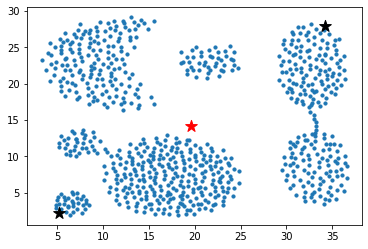

In [ ]:
plt.scatter(X,Y,s=10)
plt.scatter(center[0],center[1],color='red',s=150,marker='*')
plt.scatter(farthest_x[0],farthest_x[1],color='black',s=150,marker='*')
plt.scatter(farthest_y[0],farthest_y[1],color='black',s=150,marker='*')

TWO PARTITONS DEVELOPED AND LOOKS LIKE DIS :


311 477


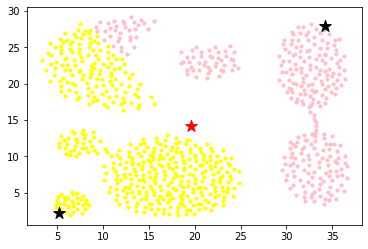

In [ ]:
n=len(X)
partition_points=[farthest_x,farthest_y]
part=len(partition_points)
#assigning partitions according to distance : 
min=10000
part1=0
partition=np.array(np.zeros(n),int)
for i in range(n):
  min=10000
  for j in range(part):
    dist=math.sqrt((partition_points[j][0]-data[0][i])**2+((partition_points[j][1]-data[1][i]))**2)
    if(min>dist):
      min=dist
      part1=j
  partition[i]=part1
#now we have partition to make :
cnt1=0
cnt2=0
for i in range(n):
  if(partition[i]==0):
    plt.scatter(X[i],Y[i],s=10,color='pink')
    cnt1+=1
  if(partition[i]==1):
    plt.scatter(X[i],Y[i],s=10,color='yellow')
    cnt2+=1
plt.scatter(center[0],center[1],color='red',s=150,marker='*')
plt.scatter(farthest_x[0],farthest_x[1],color='black',s=150,marker='*')
plt.scatter(farthest_y[0],farthest_y[1],color='black',s=150,marker='*')

#we will be counting number of data points that falls in each partition : 
print(cnt1,cnt2)
count_per=[cnt1,cnt2]

RECURSIVE ALGORITHM STARTS : 


1.CALCULATES CENTER OR MEAN POINT OF GIVEN POINTS


In [ ]:
def centre(points):
  center=np.array(np.zeros((2)),float)
  sum_x=0.0
  sum_y=0.0
  cnt_x=0
  cnt_y=0
  for i in range(n):
    if(points[i][0]!=0):
      sum_x+=points[i][0]
      cnt_x+=1
    if(points[i][1]!=0):
      sum_y+=points[i][1]
      cnt_y+=1
  center[0]=sum_x/cnt_x
  center[1]=sum_y/cnt_y
  return center

2.IT CALCULATES TWO FARTHEST CORNER POINTS INSIDE EACH PARTITION (PARAMETER IS POINTS INSIDE SINGLE PARTITION
)

In [ ]:
def two_farthest(points):
  center=np.array(np.zeros((2)),float)
  center[0]=np.mean(points[0])
  center[1]=np.mean(points[1])
  n=len(points)
  max=-10000
  posn=0
  dist=0

  for i in range(n):
    if(points[i][0]!=0):
      dist=math.sqrt((center[0]-points[i][0])**2+(center[1]-points[i][1])**2)
      if(dist>max):
        max=dist
        posn=i
  farthest_x=np.array([[]],float)
  farthest_x=[points[posn][0],points[posn][1]]
  # print(farthest_x)
#now we will be finding second farthest point on graph : 
  max=-10000
  posn=0
  for i in range(n):
    if(points[i][0]!=0):
      dist=math.sqrt((farthest_x[0]-points[i][0])**2+(farthest_x[1]-points[i][1])**2)
      if(dist>max):
        max=dist
        posn=i
  farthest_y=np.array([[]],float)
  farthest_y=[points[posn][0],points[posn][1]]
  new_two=[farthest_x,farthest_y]
  return new_two



3.IT RETURNS ARRAY THAT SHOWS IN TERMS OF NUMBER THAT WHICH POINT BELONGS TO WHICH PARTITION


In [ ]:
def partioning_array(current,cnt):
  partition=np.array(np.zeros(n),int)
  for i in range(n):
    min=10000
    for j in range(cnt):  
        dist=math.sqrt((current[j][0]-data[0][i])**2+((current[j][1]-data[1][i]))**2)
        if(min>dist):
          min=dist
          part1=j
        partition[i]=part1
  return partition

THIS MODULE GIVES US ALL THE NECESSARY PARTITION POINTS


In [ ]:
n=len(X)
chck=0
partition_points
cnt23=9
while(cnt23):
  cnt=len(partition_points)
  array=partioning_array(partition_points,cnt)
  for i in range(cnt):
    count=0
    for j in range(n):
      if(array[j]==i):
        count+=1
    if(count>math.sqrt(n)):
      points=np.array(np.zeros((count,2)),float)
      zoop=0
      count=0
      chck=i
      for z in range(n):
        if(array[z]==i):
          points[zoop][0]=data.iloc[z][0]
          points[zoop][1]=data.iloc[z][1]
          zoop+=1
  
    if(chck==i):
      list1=two_farthest(points)
      partition_points+=list1
      partition_points.pop(0)
    cnt=len(partition_points)
    a=partioning_array(partition_points,cnt)
  cnt23=cnt23-1

# print(partition_points,cnt)


PLOTTING PARTITION POINTS

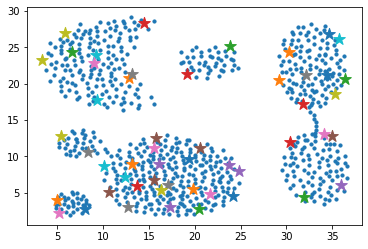

In [ ]:
plt.scatter(X,Y,s=10)
for i in range(len(partition_points)):
  plt.scatter(partition_points[i][0],partition_points[i][1],s=150,marker='*')
  

In [ ]:
#PARTITION POINTS IN ACTUAL
print(partition_points)

[[12.85, 20.75], [23.8, 25.25], [19.2, 21.35], [35.95, 6.05], [34.95, 12.75], [34.05, 13.05], [32.1, 21.15], [35.3, 18.55], [35.7, 26.15], [34.65, 26.85], [29.15, 20.55], [31.9, 4.4], [30.4, 12.05], [23.7, 8.85], [15.8, 12.6], [15.55, 11.15], [8.3, 10.55], [5.8, 26.95], [9.2, 23.9], [24.15, 4.55], [19.85, 5.5], [20.45, 2.8], [13.65, 5.9], [16.05, 8.95], [10.6, 5.05], [8.95, 22.8], [13.1, 21.3], [3.35, 23.3], [9.35, 17.7], [34.4, 21.25], [30.25, 24.3], [36.35, 20.6], [31.75, 17.2], [24.85, 7.95], [20.6, 11.15], [21.65, 4.85], [17.05, 6.05], [16.35, 5.35], [12.4, 7.1], [19.4, 9.65], [13.1, 8.95], [6.55, 24.3], [14.45, 28.35], [17.25, 3.05], [15.5, 6.75], [5.2, 2.15], [12.75, 3.0], [5.4, 12.85], [10.1, 8.65], [8.05, 2.75], [4.95, 4.05]]


PARTITION TO DATA POINTS ARRAY REPRESENTATION

In [ ]:
cnt=len(partition_points)
final_array=partioning_array(partition_points,cnt)
print(final_array)

[42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 17 18
 18 42 18 18 26 18 18 18 18 18 18 17 17 17 17 17 17 17 17 17 17 18 18 18
 18 18 18 18 18 18 18 18 18 18 41 41 17 17 17 17 17 41 41 41 41 17 41 41
 41 41 27 27 27 27 27 41 41 41 41 25 41 41 41 27 27 27 27 27 27 41 41 25
 25 25 25 25 28 25 25 27 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28
 25 25 25 25 25 25 25 25 25 25 18 26 26 26 26  0  0 25 25 25 28 28  0  0
 26 26  0  0  0 28 28 28 28  0  0  0  0 28 28 28  0  0  0  0  0  0  0  0
  0 28 47 16 16 16 16 47 47 47 47 47 47 47 47 47 47 47 47 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 48 48 40 40 48 48 40 40 15 15 15
 15 14 14 14 14 14 15 15 15 15 40 40 40 40 40 48 48 24 48 40 40 40 40 38
 38 38 38 38 38 40 40 40 40 23 15 15 15 15 15 15 23 23 23 23 40 40 44 44
 38 44 22 38 22 38 24 24 24 22 22 22 22 22 22 22 24 24 46 46 46 46 22 46
 46 46 46 22 22 44 44 46 46 46 43 43 37 22 43 43 43 43 37 37 37 37 44 44
 44 37 37 37 37 37 37 37 43 43 43 43 43 43 43 43 43

NUMBER OF POINTS IN EACH PARTITION

In [ ]:
hash_value=np.array(np.zeros(np.max(final_array)+1),int)
for i in range(n):
  hash_value[final_array[i]]+=1
for i in range(np.max(final_array+1)):
  print(i,'--',hash_value[i],'\n')

0 -- 20 

1 -- 21 

2 -- 24 

3 -- 26 

4 -- 15 

5 -- 13 

6 -- 16 

7 -- 9 

8 -- 9 

9 -- 16 

10 -- 10 

11 -- 25 

12 -- 25 

13 -- 17 

14 -- 7 

15 -- 17 

16 -- 22 

17 -- 17 

18 -- 24 

19 -- 8 

20 -- 20 

21 -- 12 

22 -- 13 

23 -- 14 

24 -- 6 

25 -- 21 

26 -- 7 

27 -- 12 

28 -- 27 

29 -- 20 

30 -- 24 

31 -- 5 

32 -- 19 

33 -- 6 

34 -- 15 

35 -- 15 

36 -- 11 

37 -- 12 

38 -- 9 

39 -- 23 

40 -- 19 

41 -- 19 

42 -- 23 

43 -- 19 

44 -- 11 

45 -- 7 

46 -- 11 

47 -- 13 

48 -- 7 

49 -- 15 

50 -- 12 



NINE COLORS USED TO DIFFERENTIATE BETWEEN DIFFERENT PARTITIONS

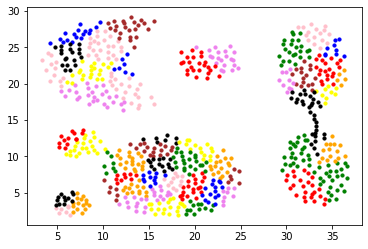

In [ ]:
color=['pink','violet','red','green','orange','black','brown','yellow','blue']
probable_centers=[]
for i in range(np.max(final_array)+1):
  points=np.array(np.zeros((n,2)),float)
  for j in range(n):
    if(final_array[j]==i):
      points[j][0]=data.iloc[j][0]
      points[j][1]=data.iloc[j][1]
  for z in range(n):
    if(points[z][0]!=0 and points[z][1]!=0):
      plt.scatter(points[z][0],points[z][1],color=color[i%9],s=10)
  probable_centers.extend([centre(points)])

PROBABLE CENTERS ON THE DATASET

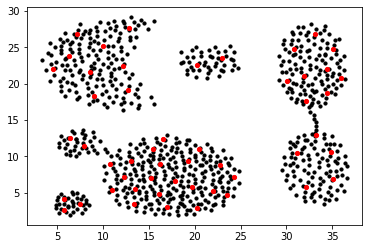

In [ ]:
plt.scatter(X,Y,color='black',s=10)
for i in range(len(probable_centers)):
  plt.scatter(probable_centers[i][0],probable_centers[i][1],color='red',s=70,marker='.')

KRUSKAL'S ALGORITHM FOR MINIMUM SPANNING TREE


In [ ]:
#euclidean distance that will act as edge weights
def distance(a,b):
  return (math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2))

MINIMUM SPANNING TREE IS HERE

In [ ]:
class Graph: 
  
    def __init__(self, NoOfNode,vertices): 
        self.V= NoOfNode
        self.vertices =  vertices
        self.graph = []
    def addEdge(self,u,v,w): 
        self.graph.append([u,v,w]) 
    def find(self, parent, i): 
        if parent[i] == i: 
            return i 
        return self.find(parent, parent[i]) 

    def union(self, parent, rank, x, y): 
        xroot = self.find(parent, x) 
        yroot = self.find(parent, y) 
 
        if rank[xroot] < rank[yroot]: 
            parent[xroot] = yroot 
        elif rank[xroot] > rank[yroot]: 
            parent[yroot] = xroot 
        else : 
            parent[yroot] = xroot 
            rank[xroot] += 1

    def KruskalMST(self): 
        result =[] 
        i = 0
        e = 0 
        self.graph =  sorted(self.graph,key=lambda item: item[2]) 
        parent = {} ; rank = {} 
        for node in self.vertices: 
            parent[node] = node 
            rank[node] = 0 
        while e < self.V -1 : 
            u,v,w =  self.graph[i] 
            i = i + 1
            x = self.find(parent, u) 
            y = self.find(parent ,v) 
            if x != y: 
                e = e + 1     
                result.append([u,v]) 
                self.union(parent, rank, x, y)

        return result
#51 PROBABLE CENTERS ALIAS NAMES : 
vertices = ['A', 'B', 'C', 'D', 'E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','A1', 'B1', 'C1', 'D1', 'E1','F1','G1','H1','I1','J1','K1','L1','M1','N1','O1','P1','Q1','R1','S1','T1','U1','V1','W1','X1','Y1']
N = 51
g = Graph(N, vertices)
for i in range(N):
  for j in range(N):
    g.addEdge(vertices[i],vertices[j],distance(probable_centers[i],probable_centers[j]))
MST = g.KruskalMST()
print(MST)


[['T1', 'Y1'], ['T', 'J1'], ['O', 'P'], ['X1', 'Y1'], ['D1', 'F1'], ['Q', 'V1'], ['L1', 'R1'], ['G', 'K'], ['W', 'M1'], ['W', 'U1'], ['I1', 'N1'], ['N', 'H1'], ['U', 'K1'], ['P', 'X'], ['X', 'S1'], ['Y', 'M1'], ['U', 'J1'], ['W', 'S1'], ['L1', 'S1'], ['M1', 'W1'], ['O1', 'W1'], ['K1', 'L1'], ['H', 'G1'], ['B1', 'P1'], ['T', 'H1'], ['H', 'F1'], ['G', 'D1'], ['E', 'F'], ['I', 'J'], ['B', 'C'], ['V', 'J1'], ['I', 'D1'], ['R', 'P1'], ['X', 'N1'], ['F', 'M'], ['J', 'E1'], ['D', 'L'], ['Z', 'P1'], ['R', 'S'], ['Z', 'C1'], ['A', 'A1'], ['S', 'A1'], ['Q', 'W1'], ['D', 'E'], ['S', 'Q1'], ['Y', 'X1'], ['F', 'G1'], ['C1', 'V1'], ['M', 'H1'], ['B', 'K']]


PLOT FOR MST

In [ ]:
#indexes are here , which probable center connected with which we can find it easily now:
indexing=[]
for i in MST:
  a=vertices.index(i[0])
  b=vertices.index(i[1])
  indexing.append([a,b])
print(indexing)



[[45, 50], [19, 35], [14, 15], [49, 50], [29, 31], [16, 47], [37, 43], [6, 10], [22, 38], [22, 46], [34, 39], [13, 33], [20, 36], [15, 23], [23, 44], [24, 38], [20, 35], [22, 44], [37, 44], [38, 48], [40, 48], [36, 37], [7, 32], [27, 41], [19, 33], [7, 31], [6, 29], [4, 5], [8, 9], [1, 2], [21, 35], [8, 29], [17, 41], [23, 39], [5, 12], [9, 30], [3, 11], [25, 41], [17, 18], [25, 28], [0, 26], [18, 26], [16, 48], [3, 4], [18, 42], [24, 49], [5, 32], [28, 47], [12, 33], [1, 10]]


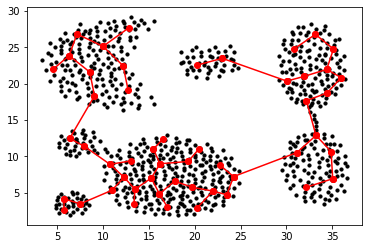

In [ ]:
mst_plot_x=[]
mst_plot_y=[]
for i in indexing:
  mst_plot_x.extend([probable_centers[i[0]][0]])
  mst_plot_x.extend([probable_centers[i[1]][0]])
  mst_plot_y.extend([probable_centers[i[0]][1]])
  mst_plot_y.extend([probable_centers[i[1]][1]])
plt.scatter(X,Y,color='black',s=10)
for i in range(len(probable_centers)):
  plt.scatter(probable_centers[i][0],probable_centers[i][1],color='red',s=70,marker='.')
# plt.plot(mst_plot_x,mst_plot_y)
for i in range(0, len(mst_plot_x), 2):
    plt.plot(mst_plot_x[i:i+2], mst_plot_y[i:i+2], 'ro-')

REMOVING K-1 LONGEST EDGES FROM MST : 


1.5398883151847824
1.591944347505766
1.6971120848997205
1.9022138053097786
1.937558063646094
1.9548725910602456
1.9852725709724868
2.019375386877093
2.0317792604648686
2.0521192003346265
2.0871718538266055
2.0973547765753775
2.1152716669984994
2.151188368669787
2.178807543285166
2.235577921248844
2.3103867220782663
2.3561122069569898
2.358432165330707
2.3589568670558334
2.360197263161633
2.4073704131302023
2.4994654365045346
2.589685331426365
2.6065122769708946
2.614294985575453
2.6224354287808462
2.7616879706212867
2.819763426126559
2.870202435662633
2.8765373908765937
2.9001727944476583
3.081343707569404
3.0927703416598082
3.1370448725742475
3.1484295302490812
3.1845796551321484
3.2018381951765678
3.301638452015134
3.3197237074321744
3.391151244076867
3.4560251317941786
3.7135391698210527
3.7487619367618046
3.751745634667816
3.902970378798407
4.898619401108093
6.444315233564769
7.67308347406699
7.707013345337826


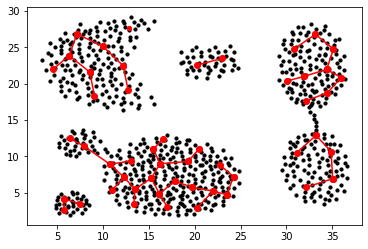

In [ ]:
for i in indexing:
  print(distance(probable_centers[i[0]],probable_centers[i[1]]))
#last k-1 nodes gives longest edges removing that
plt.scatter(X,Y,color='black',s=10)
for i in range(len(probable_centers)):
  plt.scatter(probable_centers[i][0],probable_centers[i][1],color='red',s=70,marker='.')
#removing k-1 = 6 edges, plot we get is :
for i in range(0, len(mst_plot_x)-12, 2):
    plt.plot(mst_plot_x[i:i+2], mst_plot_y[i:i+2], 'ro-')

NOW CENTER OF PROBABLE CENTERS LEFT , WILL BECOME CENTROIDS OF CLUSTERS


* NUMBER OF CONNECTED COMPONENTS WILL BE SAME AS NUMBER OF CLUSTERS , AND AFTER FINDING CONNECTED COMPONENTS , WE WILL BE FINDING CENTER OR MEAN OF THOSE INORDER TO FIND CENTROIDS.

In [ ]:
centroids=[]
cent1=0
cent2=0
cent3=0
cent4=0
cent5=0
cent6=0
cent7=0
cent8=0
cent9=0
cent10=0
cent11=0
cent12=0
cent13=0
cent14=0
for i in range(len(probable_centers)):
  if(i==0 or i==18 or (i>=25 and i<=28) or (i>=41and i<=42)):
    cent1+=probable_centers[i][0]
    cent2+=probable_centers[i][1]
  
  if(i==50 or i==49 or i==45):
    cent3+=probable_centers[i][0]
    cent4+=probable_centers[i][1]
  
  if(i==17 or i==47):
    cent5+=probable_centers[i][0]
    cent6+=probable_centers[i][1]
  
  if(i==1 or i==2):
    cent7+=probable_centers[i][0]
    cent8+=probable_centers[i][1]
  
  if((i>=3 and i<=5) or i==11 or i==12):
    cent9+=probable_centers[i][0]
    cent10+=probable_centers[i][1]
  
  if((i>=6 and i<=10) or (i>=29 and i<=32)):
    cent11+=probable_centers[i][0]
    cent12+=probable_centers[i][1]
  
  if((i>=13 and i<=16) or (i>=19 and i<=24) or (i>=33 and i<=40) or i==43 or i==46 or i==44 or i==48):
    cent13+=probable_centers[i][0]
    cent14+=probable_centers[i][1]
  
centroids.extend([[cent1/8],[cent2/8]])
centroids.extend([[cent3/3],[cent4/3]])
centroids.extend([[cent5/2],[cent6/2]])
centroids.extend([[cent7/2],[cent8/2]])
centroids.extend([[cent9/5],[cent10/5]])
centroids.extend([[cent11/9],[cent12/9]])
centroids.extend([[cent13/22],[cent14/22]])

PLOT OF CENTROIDS


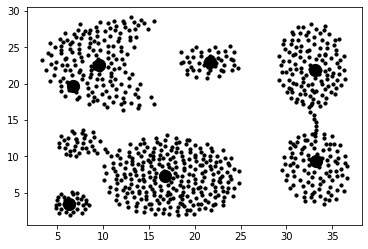

In [ ]:
plt.scatter(X,Y,color='black',s=10)
for i in range(0,len(centroids)-1,2):
  plt.scatter(centroids[i],centroids[i+1],color='black',s=150)

NOW WE ARE READY TO APPLY K_MEANS